In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
from joblib import dump, load

In [2]:
df = pd.read_csv('BTC2019-2024.csv')
df1 = df.reset_index()['Close']

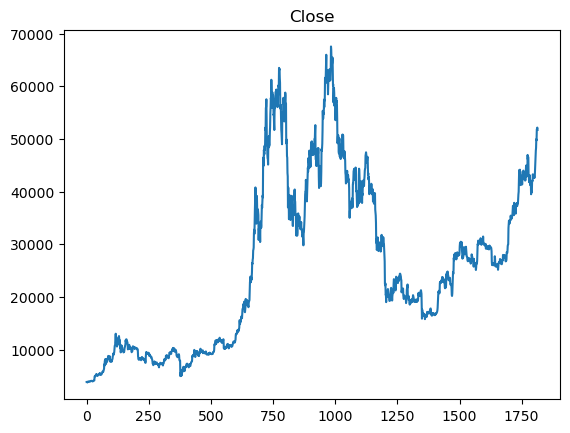

In [3]:
plt.plot(df1)
plt.title("Close")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))


train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [6]:
# 5. Tạo dataset cho mô hình
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
X_train.shape

(1169, 100)

### RandomForest

In [8]:
model=RandomForestRegressor()

In [9]:
# best_parameters

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
# Lưu mô hình vào file
with open('Model/rf.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Tải mô hình từ file
with open('Model/rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [13]:
train_predict = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)


In [14]:
y_pred

array([0.23210107, 0.23221977, 0.23199572, 0.23221977, 0.23152605,
       0.23085183, 0.23053645, 0.230441  , 0.22984106, 0.23045473,
       0.2306732 , 0.23019941, 0.23023731, 0.22969752, 0.23481182,
       0.23767732, 0.23137925, 0.23024859, 0.23016443, 0.23015314,
       0.2290912 , 0.22986916, 0.22915213, 0.22917292, 0.22953121,
       0.23084269, 0.23099861, 0.22965347, 0.22906845, 0.22942115,
       0.2295005 , 0.2299404 , 0.22954351, 0.2299404 , 0.22953121,
       0.22990968, 0.2295005 , 0.23020645, 0.23065799, 0.23068871,
       0.22988392, 0.23018068, 0.23176536, 0.23722329, 0.23926711,
       0.2390337 , 0.28997163, 0.28988428, 0.29314644, 0.29384888,
       0.25660971, 0.29171959, 0.31989144, 0.31975411, 0.3196283 ,
       0.31999254, 0.31940243, 0.31953996, 0.31929253, 0.31938878,
       0.31549841, 0.31377385, 0.3099985 , 0.31325602, 0.31291738,
       0.31373363, 0.31395361, 0.31511462, 0.3143322 , 0.31572888,
       0.31435861, 0.31243219, 0.30771244, 0.30627322, 0.31046

In [15]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1

lst_output = np.array(lst_output).reshape(-1, 1)

### Bagging

In [16]:
from sklearn.ensemble import BaggingRegressor

In [17]:
# Xây dựng mô hình Bagged
bagged_rf = BaggingRegressor(estimator=rf_model, n_estimators=5, random_state=42)

In [18]:
# Huấn luyện mô hình
bagged_rf.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=5,
                 random_state=42)

In [19]:
#Lưu mô hình
dump(bagged_rf, 'Model/rf_bagging.joblib')

['Model/rf_bagging.joblib']

In [20]:
# Tải mô hình
bagged_rf = load('Model/rf_bagging.joblib')

In [21]:
#Dự đoán
bagged_train_predict = bagged_rf.predict(X_train)
bagged_y_pred = bagged_rf.predict(X_test)

In [22]:
bagged_y_pred

array([0.24086697, 0.24088399, 0.24070956, 0.24090699, 0.24056562,
       0.2407755 , 0.24042227, 0.24031429, 0.24048391, 0.24012606,
       0.24009928, 0.24010993, 0.24036256, 0.24011724, 0.24160917,
       0.24326629, 0.241028  , 0.24015989, 0.23979127, 0.23973667,
       0.23940293, 0.23961229, 0.23937992, 0.23968414, 0.23967937,
       0.24145818, 0.24154408, 0.24088889, 0.24069641, 0.2405386 ,
       0.24028435, 0.24044623, 0.2401912 , 0.24045309, 0.24051918,
       0.24049108, 0.24069479, 0.2408064 , 0.24098662, 0.24099967,
       0.24085974, 0.24076012, 0.2411588 , 0.24304672, 0.24393248,
       0.2461215 , 0.28536817, 0.28273708, 0.29332674, 0.29406328,
       0.26776852, 0.28854008, 0.31292644, 0.31644779, 0.31516211,
       0.31753823, 0.3136903 , 0.31739232, 0.3171199 , 0.31740485,
       0.31591605, 0.31394718, 0.31153806, 0.31361199, 0.31454854,
       0.31342272, 0.31441112, 0.31434   , 0.31394829, 0.3147039 ,
       0.31456544, 0.31417342, 0.30337369, 0.30089002, 0.30161

In [23]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input1 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input1[0])
bagg_lst_output1 = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input1 = np.array(temp_input[1:])
        x_input1 = x_input1.reshape(1, -1)
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output1.extend(yhat.tolist())
        i += 1
    else:
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        bagg_lst_output1.extend(yhat.tolist())
        i += 1

bagg_lst_output1 = np.array(bagg_lst_output1).reshape(-1, 1)


In [24]:
# 11. Dự báo giá cho 60 ngày tiếp theo
x_input2 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input2[0])
bagg_lst_output2 = []
n_steps = 100
i = 0
while i < 60:
    if len(temp_input) > 100:
        x_input2 = np.array(temp_input[1:])
        x_input2 = x_input2.reshape(1, -1)
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output2.extend(yhat.tolist())
        i += 1
    else:
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        bagg_lst_output2.extend(yhat.tolist())
        i += 1

bagg_lst_output2 = np.array(bagg_lst_output2).reshape(-1, 1)

In [25]:
# 11. Dự báo giá cho 90 ngày tiếp theo
x_input3 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input3[0])
bagg_lst_output3 = []
n_steps = 100
i = 0
while i < 90:
    if len(temp_input) > 100:
        x_input3 = np.array(temp_input[1:])
        x_input3 = x_input3.reshape(1, -1)
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output3.extend(yhat.tolist())
        i += 1
    else:
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        bagg_lst_output3.extend(yhat.tolist())
        i += 1

bagg_lst_output3 = np.array(bagg_lst_output3).reshape(-1, 1)

### Trực quan

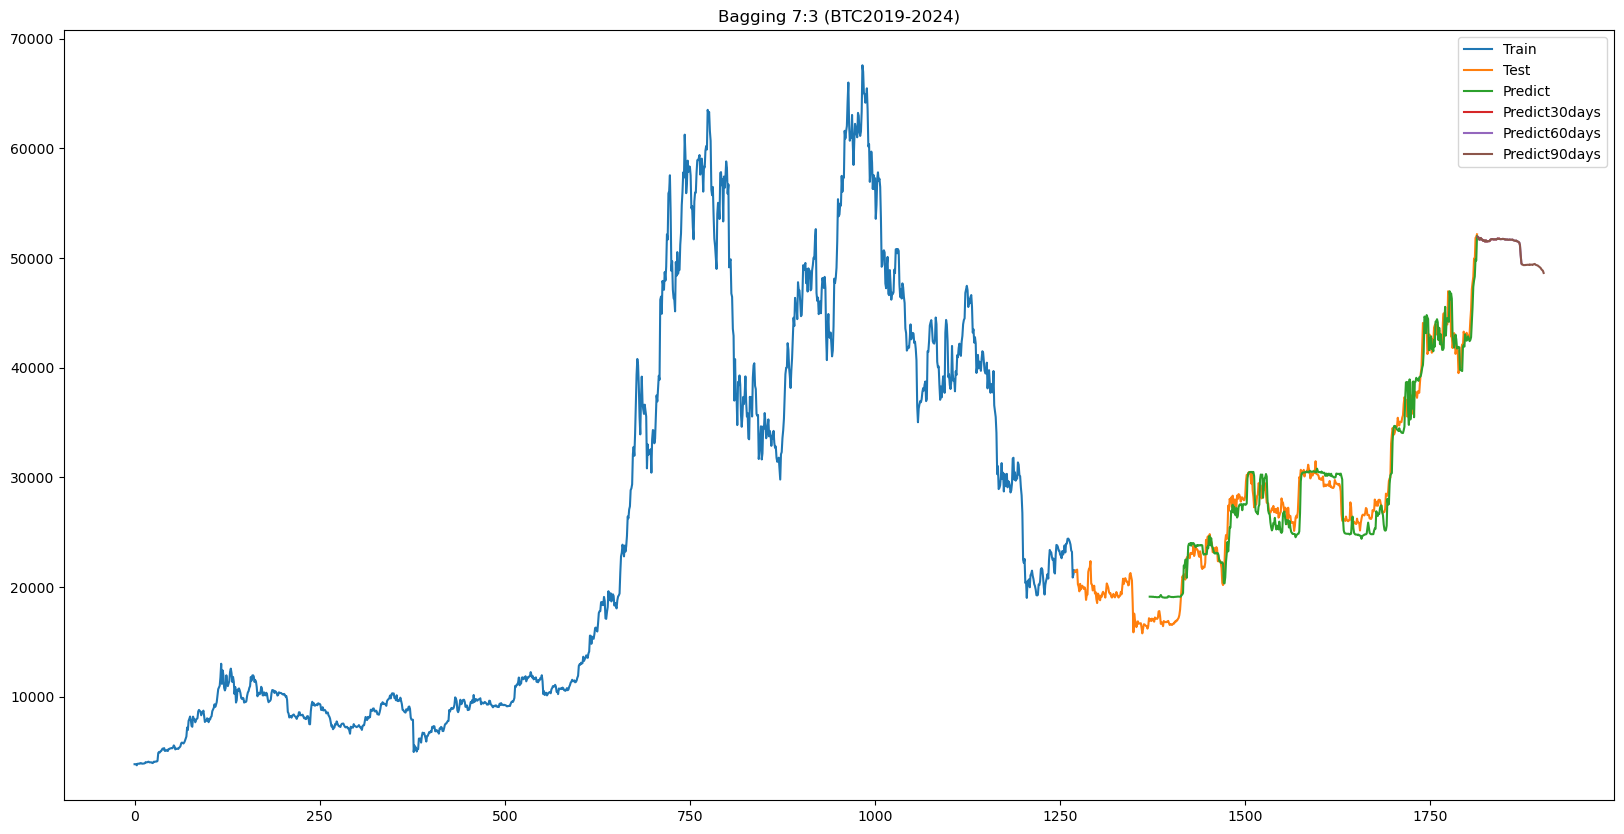

In [26]:
plt.figure(figsize=(20, 10))

plt.title('Bagging 7:3 (BTC2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(bagged_y_pred.reshape(-1,1)))
prediect_data_index1 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index1,scaler.inverse_transform(bagg_lst_output1))
prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(bagg_lst_output2))
prediect_data_index3 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index3,scaler.inverse_transform(bagg_lst_output3))
plt.legend(['Train','Test','Predict','Predict30days','Predict60days','Predict90days'])
plt.show()

In [27]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler



# Assume you have predictions in the scaled form
predictions_scaled = np.array(bagged_y_pred).reshape(-1, 1)
predictions_scaled1 = np.array(y_test).reshape(-1, 1)

# Inverse transform the scaled predictions
predictions_original = scaler.inverse_transform(predictions_scaled)
predictions_original1 = scaler.inverse_transform(predictions_scaled1)


In [28]:
#Đánh giá trên tập test
print("Chỉ số MSE trên tập test")
print("Bagging:", round(metrics.mean_squared_error(y_test, predictions_original), 4))
test_rmse = np.sqrt(np.mean((predictions_original - predictions_original1)**2))
print('Testing RMSE:', test_rmse)
# Tính MAPE
test_mape = np.mean(np.abs((predictions_original - predictions_original1) / y_test)) * 100
print('Testing MAPE:', test_mape)

Chỉ số MSE trên tập test
Bagging: 931339246.2178
Testing RMSE: 1319.78379803893
Testing MAPE: 292611.2195429251
